# AutoETS models

In [15]:
import numpy as np
import pandas as pd

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Esperanza_vida.csv", usecols=[1,2])
df.head()

,year,value
0,1960-01-01,69.123902
1,1961-01-01,69.760244
2,1962-01-01,69.149756
3,1963-01-01,69.248049
4,1964-01-01,70.311707


In [20]:
print(df.dtypes)

year      object
value    float64
dtype: object


In [29]:
pip install statsforecast

Note: you may need to restart the kernel to use updated packages.


In [32]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

KeyError: 'ds'

KeyError: 'y'

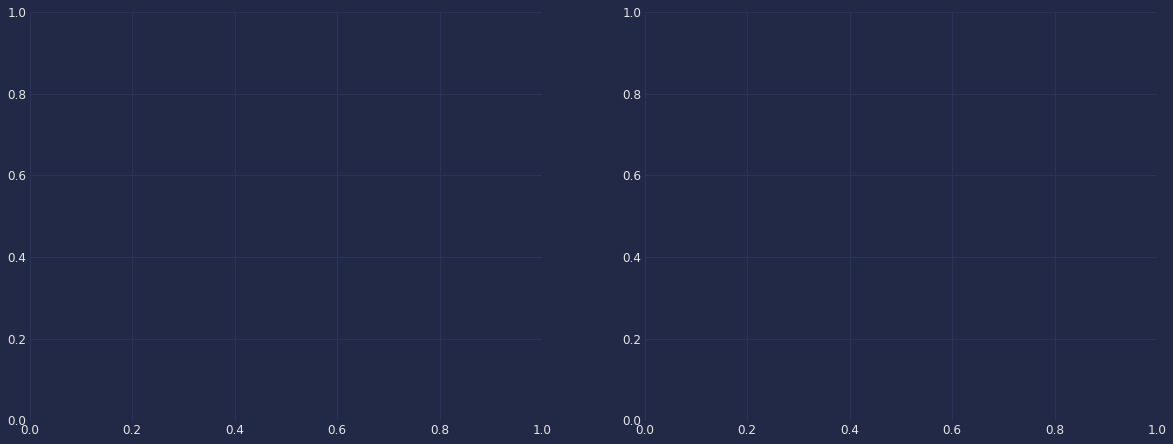

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=20, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Plot
plot_pacf(df["y"],  lags=20, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();


In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df["y"], model = "add", period=1)
a.plot();


KeyError: 'y'

In [35]:
train = df[df.ds<='2013-01-01'] 
test = df[df.ds>'2013-01-01']

AttributeError: 'DataFrame' object has no attribute 'ds'

In [36]:
train.shape, test.shape

NameError: name 'train' is not defined

In [37]:
((54, 3), (6, 3))

((54, 3), (6, 3))

In [38]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
plt.show()


NameError: name 'train' is not defined

In [39]:
from statsforecast.models import AutoETS

In [40]:
autoets = AutoETS(model=["A","Z","N"],  alias="AutoETS", season_length=1)

In [41]:
autoets = autoets.fit(df["y"].values)
autoets

KeyError: 'y'

In [42]:
AutoETS

statsforecast.models.AutoETS

In [43]:
y_hat_dict = autoets.predict(h=6)
y_hat_dict


AttributeError: 'AutoETS' object has no attribute 'model_'

In [44]:
{'mean': array([83.56937105, 83.65696041, 83.74454977, 83.83213913, 83.91972848,
        84.00731784])}


NameError: name 'array' is not defined

In [45]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()


NameError: name 'train' is not defined

In [46]:
y_hat_dict = autoets.predict(h=6, level=[80,90,95])
y_hat_dict


AttributeError: 'AutoETS' object has no attribute 'model_'

In [47]:
{'mean': array([83.56937105, 83.65696041, 83.74454977, 83.83213913, 83.91972848,
        84.00731784]),
 'lo-95': array([83.09409059, 83.17958519, 83.25889648, 83.32836493, 83.3852606 ,
        83.42814393]),
 'lo-90': array([83.17050311, 83.2563345 , 83.33697668, 83.40935849, 83.4711889 ,
        83.52125977]),
 'lo-80': array([83.25860186, 83.34482153, 83.42699815, 83.50273888, 83.57025872,
        83.62861638]),
 'hi-80': array([83.88014025, 83.96909929, 84.06210139, 84.16153937, 84.26919825,
        84.38601931]),
 'hi-90': array([83.96823899, 84.05758633, 84.15212286, 84.25491976, 84.36826807,
        84.49337591]),
 'hi-95': array([84.04465152, 84.13433563, 84.23020306, 84.33591332, 84.45419637,
        84.58649176])}


NameError: name 'array' is not defined

In [48]:
forecast["hat"]=y_hat_dict.get("mean")

forecast["lo-80"]=y_hat_dict.get("lo-80")
forecast["hi-80"]=y_hat_dict.get("hi-80")

forecast["lo-90"]=y_hat_dict.get("lo-80")
forecast["hi-90"]=y_hat_dict.get("hi-80")

forecast["lo-95"]=y_hat_dict.get("lo-95")
forecast["hi-95"]=y_hat_dict.get("hi-95")
forecast


NameError: name 'y_hat_dict' is not defined

# Con mi codigo del proyecto del oro

# Unique value

[*********************100%***********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  143.860001  144.210007  143.399994  143.949997  143.949997   
2020-01-03  145.750000  146.320007  145.399994  145.860001  145.860001   
2020-01-06  148.440002  148.479996  146.949997  147.389999  147.389999   
2020-01-07  147.570007  148.139999  147.429993  147.970001  147.970001   
2020-01-08  148.490005  148.610001  146.139999  146.860001  146.860001   

              Volume Unique_ID  
Date                            
2020-01-02   7733800     GLD_0  
2020-01-03  12272800     GLD_1  
2020-01-06  14403300     GLD_2  
2020-01-07   7978500     GLD_3  
2020-01-08  22248500     GLD_4  


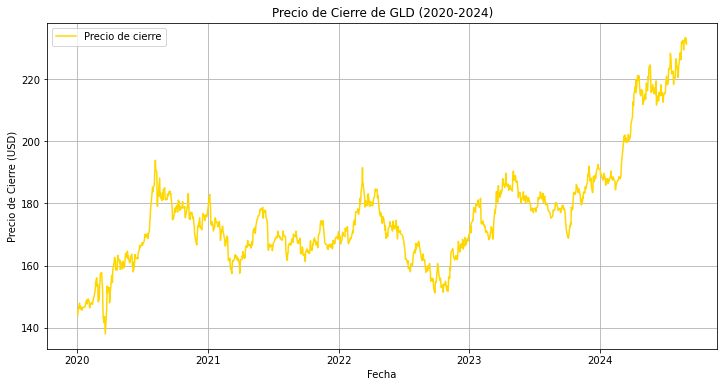

In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar datos de oro (ETF GLD)
gold_data = yf.download('GLD', start='2020-01-01', end='2024-09-01')

# Crear un ID único para cada registro
gold_data['Unique_ID'] = [f'GLD_{i}' for i in range(len(gold_data))]

# Visualizar los primeros registros para verificar
print(gold_data.head())

# Graficar los precios de cierre
plt.figure(figsize=(12, 6))
plt.plot(gold_data.index, gold_data['Close'], label='Precio de cierre', color='gold')
plt.title('Precio de Cierre de GLD (2020-2024)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid()
plt.show()


# Autocorrelación

Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  143.860001  144.210007  143.399994  143.949997  143.949997   
2020-01-03  145.750000  146.320007  145.399994  145.860001  145.860001   
2020-01-06  148.440002  148.479996  146.949997  147.389999  147.389999   
2020-01-07  147.570007  148.139999  147.429993  147.970001  147.970001   
2020-01-08  148.490005  148.610001  146.139999  146.860001  146.860001   

              Volume Unique_ID  
Date                            
2020-01-02   7733800     GLD_0  
2020-01-03  12272800     GLD_1  
2020-01-06  14403300     GLD_2  
2020-01-07   7978500     GLD_3  
2020-01-08  22248500     GLD_4  


<Figure size 720x432 with 0 Axes>

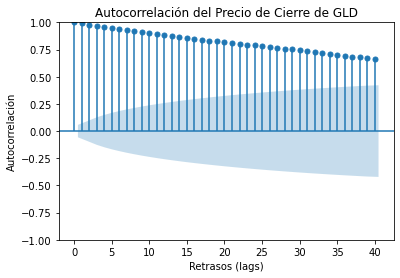

In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

gold_data = yf.download('GLD', start='2020-01-01', end='2024-09-01')

gold_data['Unique_ID'] = [f'GLD_{i}' for i in range(len(gold_data))]

print(gold_data.head())

plt.figure(figsize=(10, 6))
plot_acf(gold_data['Close'].dropna(), lags=40)  # Usa hasta 40 lags para ver correlaciones pasadas
plt.title('Autocorrelación del Precio de Cierre de GLD')
plt.xlabel('Retrasos (lags)')
plt.ylabel('Autocorrelación')
plt.show()


# Autoets

[*********************100%***********************]  1 of 1 completed
/Users/paulapelayo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/paulapelayo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


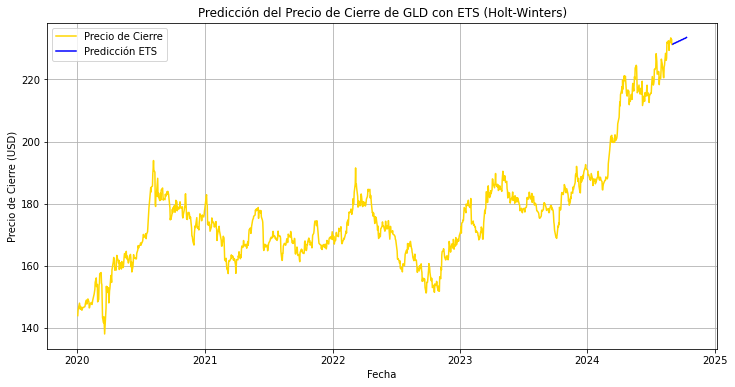

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

gold_data = yf.download('GLD', start='2020-01-01', end='2024-09-01')

close_prices = gold_data['Close'].dropna()


model = ExponentialSmoothing(
    close_prices,
    trend='add',   
    seasonal=None  
).fit()


forecast_horizon = 30
forecast = model.forecast(forecast_horizon)

plt.figure(figsize=(12, 6))
plt.plot(close_prices.index, close_prices, label='Precio de Cierre', color='gold')
plt.plot(pd.date_range(close_prices.index[-1], periods=forecast_horizon + 1, freq='B')[1:], 
         forecast, label='Predicción ETS', color='blue')
plt.title('Predicción del Precio de Cierre de GLD con ETS (Holt-Winters)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid()
plt.show()